In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('train.csv')
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


- No missing values

In [4]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

- Transform the 'date' attribute to datetime data type

In [5]:
{column: len(df[column].unique()) for column in df.columns}

{'date': 1826, 'store': 10, 'item': 50, 'sales': 213}

- Unique values in individual column

In [6]:
print('- Data collection from', df['date'].min(), 'to', df['date'].max())
print('- Dataset includes 50 items from 10 stores')

- Data collection from 2013-01-01 00:00:00 to 2017-12-31 00:00:00
- Dataset includes 50 items from 10 stores


In [7]:
df_train = df[df['store']==1]
df_train = df_train[df_train['item']==1]

df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.dayofyear
df_train['weekday'] = df_train['date'].dt.weekday

df_train

,date,store,item,sales,year,month,day,weekday
0,2013-01-01,1,1,13,2013,1,1,1
1,2013-01-02,1,1,11,2013,1,2,2
2,2013-01-03,1,1,14,2013,1,3,3
3,2013-01-04,1,1,13,2013,1,4,4
4,2013-01-05,1,1,10,2013,1,5,5
...,...,...,...,...,...,...,...,...
1821,2017-12-27,1,1,14,2017,12,361,2
1822,2017-12-28,1,1,19,2017,12,362,3
1823,2017-12-29,1,1,15,2017,12,363,4
1824,2017-12-30,1,1,27,2017,12,364,5


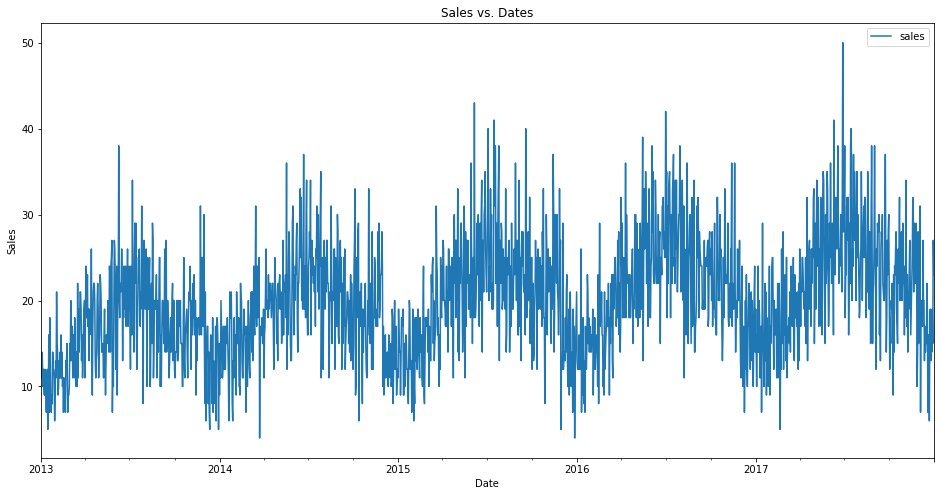

In [8]:
df_train.plot('date', 'sales', figsize=(16, 8))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales vs. Dates')
plt.show();

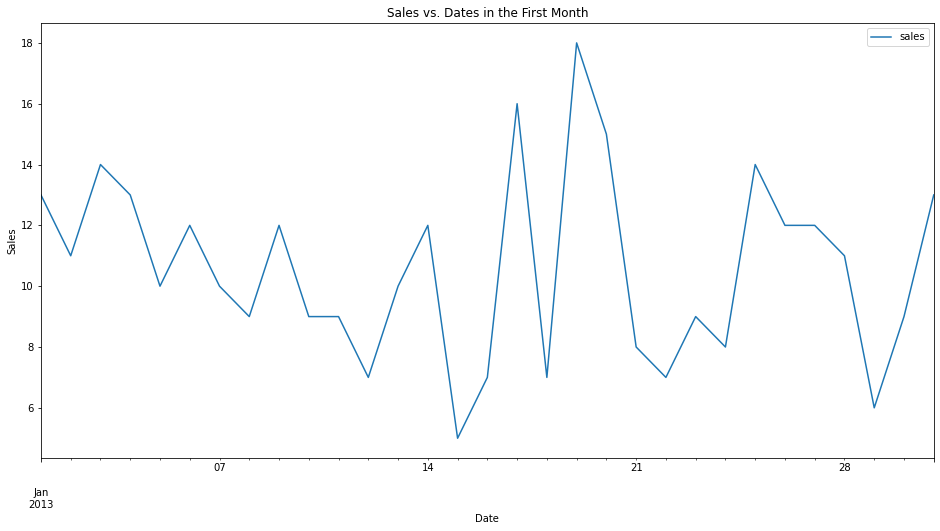

In [9]:
df_train[:31].plot('date', 'sales', figsize=(16, 8))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales vs. Dates in the First Month')
plt.show();

- Upward trend in sales over the years
- Seasonal pattern identified, with mid-year as sales peak

In [23]:
day_0 = df_train[df_train['weekday']==0]['sales']
day_1 = df_train[df_train['weekday']==1]['sales']
day_2 = df_train[df_train['weekday']==2]['sales']
day_3 = df_train[df_train['weekday']==3]['sales']
day_4 = df_train[df_train['weekday']==4]['sales']
day_5 = df_train[df_train['weekday']==5]['sales']
day_6 = df_train[df_train['weekday']==6]['sales']

data = [day_0, day_1, day_2, day_3, day_4, day_5, day_6]
label = ['day 0', 'day 1', 'day 2', 'day 3', 'day 4', 'day 5', 'day 6']

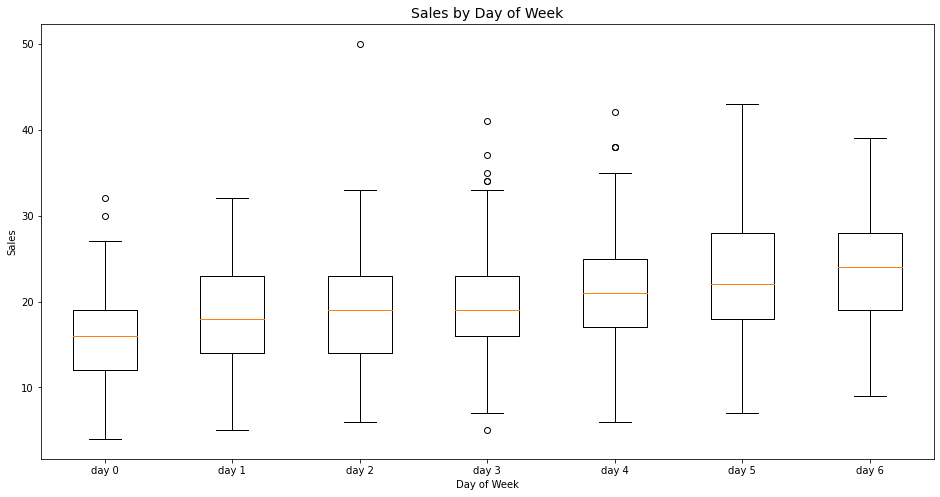

In [25]:
plt.figure(figsize=(16,8))
plt.boxplot(data, labels=label)
plt.xlabel('Day of Week')
plt.ylabel('Sales')
plt.title('Sales by Day of Week', fontsize=14)
plt.show();

- Higher sales on Friday and Saturday (day 5 and day 6), Sunday with lowest sales